In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import math
import scipy.stats as stats
from tqdm import tqdm 
import time
import multiprocessing as mp
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import curve_fit
#import latexify
import random
import scipy.special as sp

In [2]:
cos = np.array([0.97,0.88,0.75,0.58,0.41,0.25,0.12])
tetha = np.arange(10,80,10)
I_1 = np.array([2.36,2.22,1.98,1.55,1.15,0.82,0.44])

In [3]:
def cos_quad(tetha):
    o = tetha*np.pi/180
    return np.cos(o)**2

In [4]:
y = np.array(cos_quad(tetha))

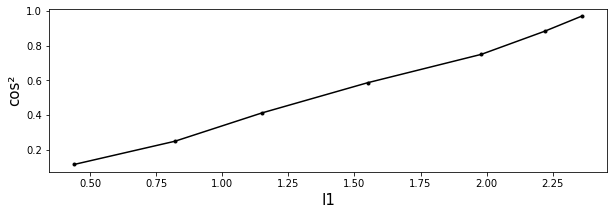

In [5]:
plt.figure(figsize=[10, 3], facecolor='white')
plt.plot(I_1,y,'k.-')
plt.ylabel('cos²', fontsize=15)
plt.xlabel('I1',  fontsize=15)
#plt.axhline(0.1, color='r', linestyle='dotted', linewidth=2)
plt.show()

 - Ajustando uma reta:

In [6]:
def reta(x,a,b):
    return b + a*x

In [7]:
parameters, covariance = curve_fit(reta, I_1, cos, p0=[0.4, 0.1])

In [8]:
print('Parametros: \n', parameters, '\n')
print('Covariancia: \n', covariance)

Parametros: 
 [ 0.4390857 -0.0941688] 

Covariancia: 
 [[ 0.00013441 -0.000202  ]
 [-0.000202    0.000365  ]]


In [9]:
error = np.sqrt(np.diagonal(covariance))
print('Incertezas: \n', error)

Incertezas: 
 [0.01159349 0.0191051 ]


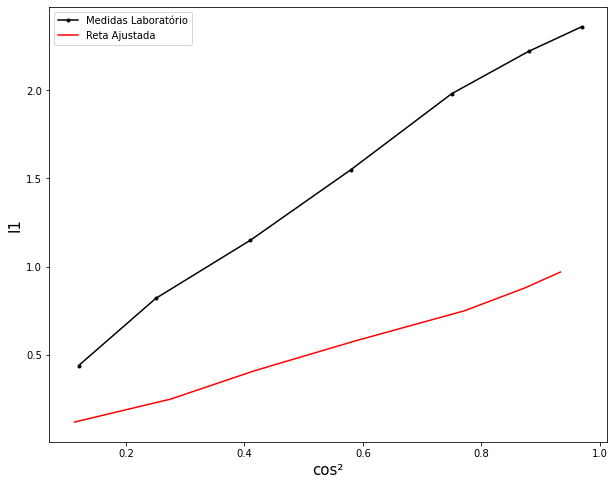

In [17]:
y_modelo = reta(x=I_1, a=0.4390857 - 0.01159349, b=-0.0941688 + 0.0191051)

plt.figure(figsize=[10, 8], facecolor='white')
plt.plot(cos,I_1, 'k.-')
plt.plot(y_modelo, cos, 'r-')
plt.xlabel('cos²', fontsize=15)
plt.ylabel('I1',  fontsize=15)
plt.legend(['Medidas Laboratório', 'Reta Ajustada'])
plt.show()

In [11]:
max(y_modelo)

0.9338179156

In [12]:
cos_quad(10)

0.9698463103929541

In [13]:
x = cos_quad(10)/0.4390857 #I_1 maximo

In [14]:
x 

2.20878591671957

In [15]:
def DR(aprox,exact):
    return (abs(aprox - exact)/exact)*100

In [16]:
DR(2.360,2.387)

1.1311269375785562